In [31]:

# Kerakli kutubxonlardi tortib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression


In [2]:
# Datani yuklab olamiz

df = pd.read_csv("SuperMarket Analysis.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   994 non-null    float64
 9   Sales                    995 non-null    float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,994.000000,995.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.400843,322.726343,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.731376,245.679779,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.864625,125.286000,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.680000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.563750,471.009000,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       4
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     6
Sales                      5
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_26956\982742513.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_26956\982742513.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_26956\2228369844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df, palette='Set2')


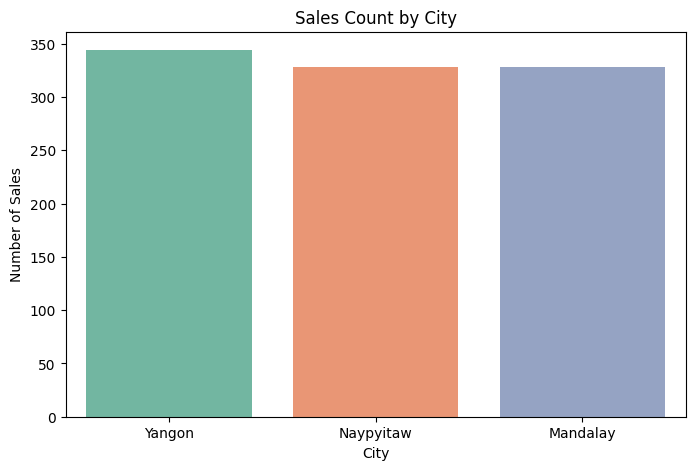

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='City', data=df, palette='Set2')
plt.title("Sales Count by City")
plt.xlabel("City")
plt.ylabel("Number of Sales")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26956\2795723700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


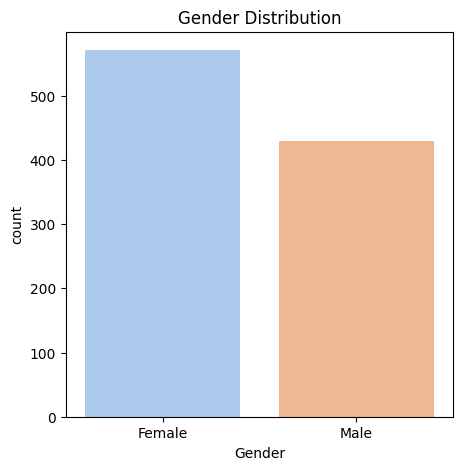

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df.drop(columns=["Invoice ID", "Date", "Time"], inplace=True)

In [13]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(7)
m

In [15]:
# targetni aniqlab olish

x=df.drop('Rating',axis=1)

In [16]:
x.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200
2,0,2,1,0,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155
3,0,2,0,0,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880
4,0,2,0,0,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085


In [17]:
y=df["Rating"]

In [18]:
# Splitting ga ajratib olamiz

x_train, x_temp, y_train, y_temp=train_test_split(x,y, test_size=0.3, random_state=42)

In [37]:
# Splitting ga ajratib olamiz
x_val, x_test, y_val, y_test=train_test_split(x_temp, y_temp, test_size=0.3, random_state=42)

In [26]:
model = LinearRegression()

In [21]:
len(x_train)

700

In [22]:
len(x_val)

150

In [27]:
# modelni moslashtirib olamiz
model.fit(x_train, y_train)

LinearRegression()

In [44]:
#Prediction teskhiramiz
y_pred=model.predict(x_test)

In [45]:
#y predictionni teskhiramiz

y_pred

array([6.61809461, 7.22180088, 6.84845225, 7.26860486, 6.76885482,
       7.08680731, 7.24060879, 7.33406329, 7.04753932, 7.07188952,
       7.27099295, 6.7658954 , 6.90479254, 7.30907084, 6.89394864,
       6.83723218, 6.72567337, 6.60439729, 6.52213243, 6.99053861,
       7.1143481 , 7.17332939, 7.09431695, 7.18730615, 6.62560767,
       7.04999205, 7.16439174, 6.90935606, 6.88959133, 6.86494654,
       7.03314196, 6.90740149, 6.92921273, 7.47879217, 7.11964789,
       7.19433748, 7.11714828, 6.93727278, 6.92194122, 7.42798183,
       6.88546138, 6.78544229, 6.97147338, 7.1383405 , 6.79958456,
       6.67894002, 7.31890569, 7.02435688, 7.21639284, 7.18904776,
       7.29342877, 6.97170909, 6.89838765, 6.83785934, 6.78960099,
       7.01982378, 6.85567764, 7.00874827, 7.61274389, 7.36128116,
       7.35912468, 7.03275298, 7.15709902, 6.99156254, 6.63790953,
       7.30595601, 7.02676465, 6.89557121, 7.1360742 , 6.89476945,
       7.18157472, 6.75433546, 7.02580272, 7.02066481, 6.85431

In [46]:
#accuracy ni tekshiramiz

mse = mean_squared_error(y_test, y_pred)


In [47]:
print("Mean Squared Error:", mse)


Mean Squared Error: 2.943089483636136


In [39]:
r2 = model.score(x_test, y_test)
print("R-squared:", r2)

R-squared: -0.026480526964847817
